In [159]:
path="/content/drive/MyDrive/Colab Notebooks/HotelBookingDemand"

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Exploration

In [161]:
df=pd.read_csv(path+"/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [162]:
print(df.shape)
df.info()

(119390, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  mea

In [163]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


## Data Preproccessing

In [164]:
df.drop(columns=['company'], axis=1, inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['children'].fillna(0, inplace=True)
df["agent"].fillna(0, inplace=True)
df["agent"] = df["agent"].astype(int).astype(str)
df["agent"].replace("0", "No Agent", inplace=True)

/tmp/ipython-input-4002480986.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0], inplace=True)
/tmp/ipython-input-4002480986.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [165]:
df["arrival_date"] = pd.to_datetime(
    df["arrival_date_year"].astype(str) + "-" +
    df["arrival_date_month"] + "-" +
    df["arrival_date_day_of_month"].astype(str),
    errors='coerce'
)
df.drop(["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month", "arrival_date_week_number", 'reservation_status_date'], axis=1, inplace=True)

In [166]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
babies,0
meal,0
country,0


In [167]:
df.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363,2016-08-28 16:39:45.727447808
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2015-07-01 00:00:00
25%,0.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2016-03-13 00:00:00
50%,0.000000,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2016-09-06 00:00:00
75%,1.000000,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-03-18 00:00:00
max,1.000000,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-08-31 00:00:00
std,0.482918,106.863097,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798,NaN


In [168]:
df.shape

(119390, 27)

In [169]:
# there is no reservations 😂
df = df[~(
    (df["adults"] == 0) &
    (df["children"] == 0.0) &
    (df["babies"] == 0.0)
)]
df = df[df["adr"] >= 0]
df = df[df["adr"] <= 1000]
df = df[df["lead_time"] <= 500]
df.shape

(118727, 27)

## Data Visualization

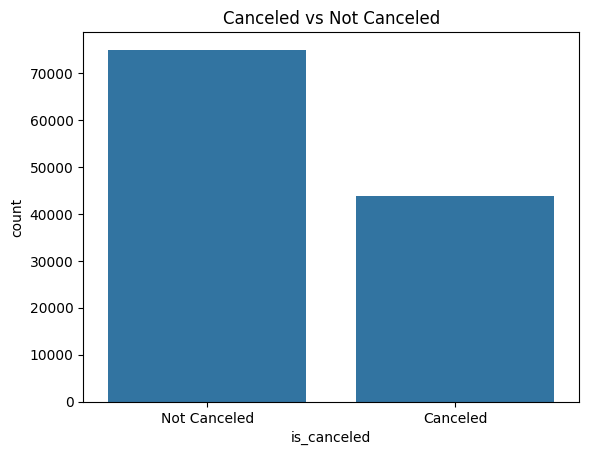

In [170]:
# Countplot
sns.countplot(x='is_canceled', data=df)
plt.title("Canceled vs Not Canceled")
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()


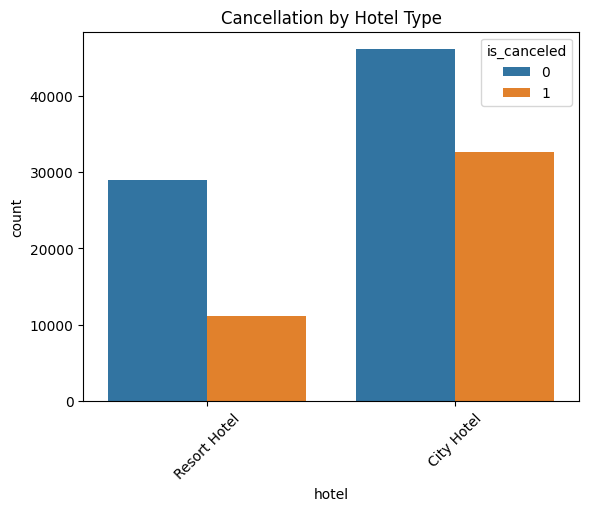

In [171]:
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title("Cancellation by Hotel Type")
plt.xticks(rotation=45)
plt.show()


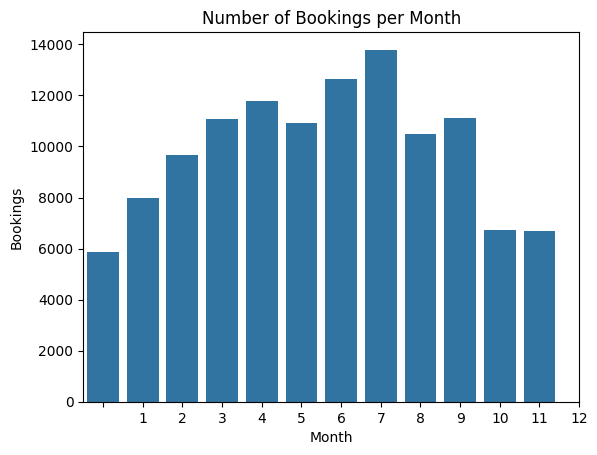

In [172]:
df['month'] = df['arrival_date'].dt.month

sns.countplot(x='month', data=df)
plt.title("Number of Bookings per Month")
plt.xlabel("Month")
plt.ylabel("Bookings")
plt.xticks(range(0,13), [''] + [str(m) for m in range(1,13)])  # 1 to 12
plt.show()

In [173]:
df.drop('month', axis=1, inplace=True)

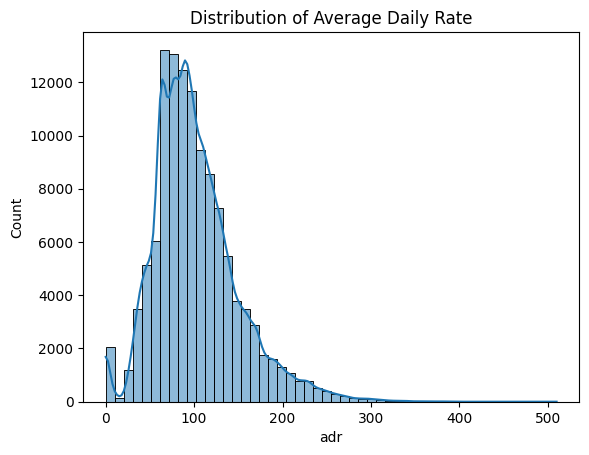

In [174]:
sns.histplot(df['adr'], bins=50, kde=True)
plt.title("Distribution of Average Daily Rate")
plt.show()

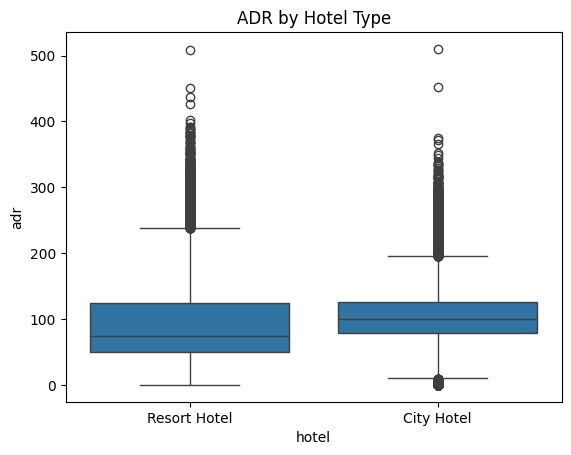

In [175]:
sns.boxplot(x='hotel', y='adr', data=df)
plt.title("ADR by Hotel Type")
plt.show()

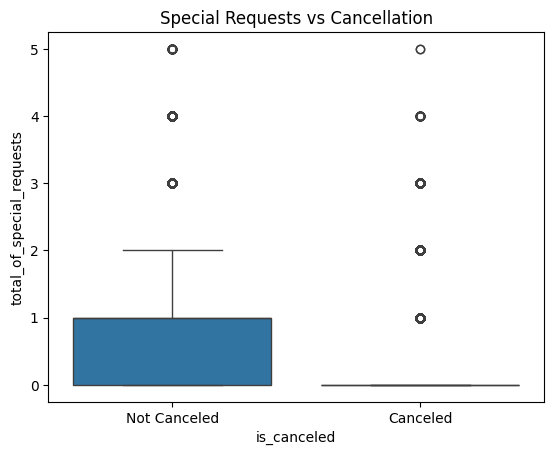

In [176]:
sns.boxplot(x='is_canceled', y='total_of_special_requests', data=df)
plt.title("Special Requests vs Cancellation")
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

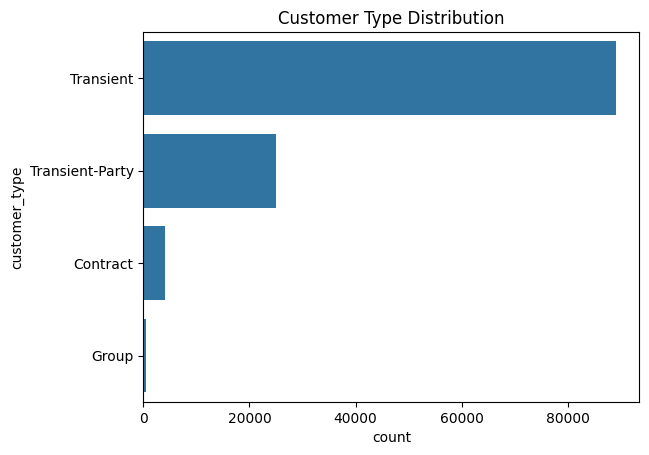

In [177]:
sns.countplot(y='customer_type', data=df, order=df['customer_type'].value_counts().index)
plt.title("Customer Type Distribution")
plt.show()

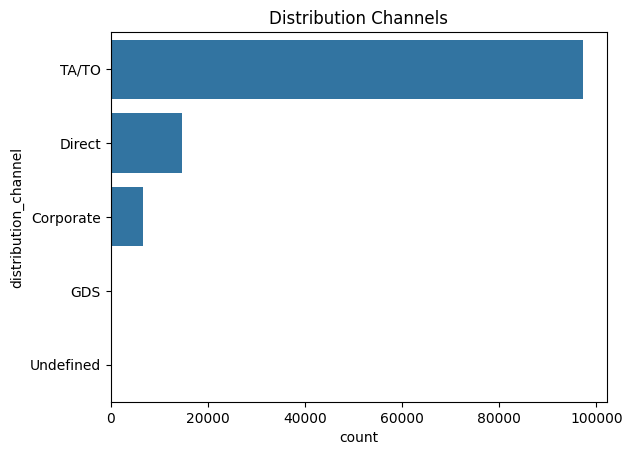

In [178]:
sns.countplot(y='distribution_channel', data=df, order=df['distribution_channel'].value_counts().index)
plt.title("Distribution Channels")
plt.show()

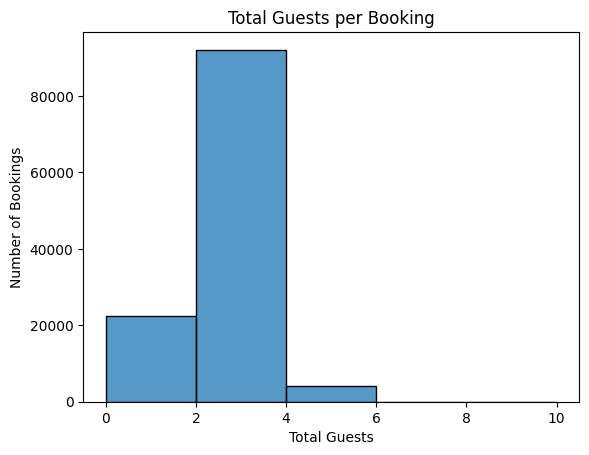

In [179]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
sns.histplot(df['total_guests'], bins=5, binrange=(0, 10))
plt.title("Total Guests per Booking")
plt.xlabel("Total Guests")
plt.ylabel("Number of Bookings")
plt.show()

In [180]:
df.drop('total_guests', axis=1, inplace=True)

<Axes: title={'center': 'Top 10 Countries by Bookings'}, xlabel='country'>

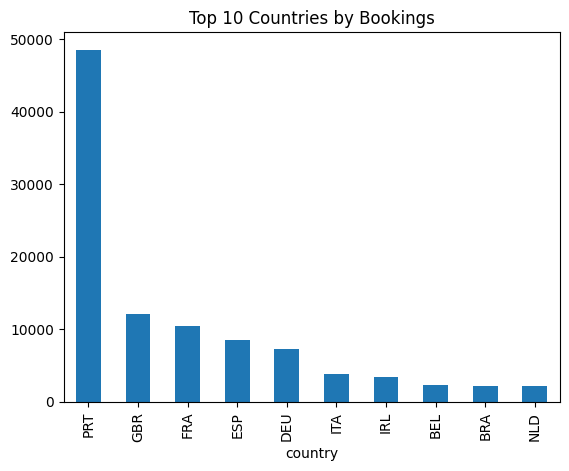

In [181]:
df['country'].value_counts().head(10).plot(kind='bar', title='Top 10 Countries by Bookings')

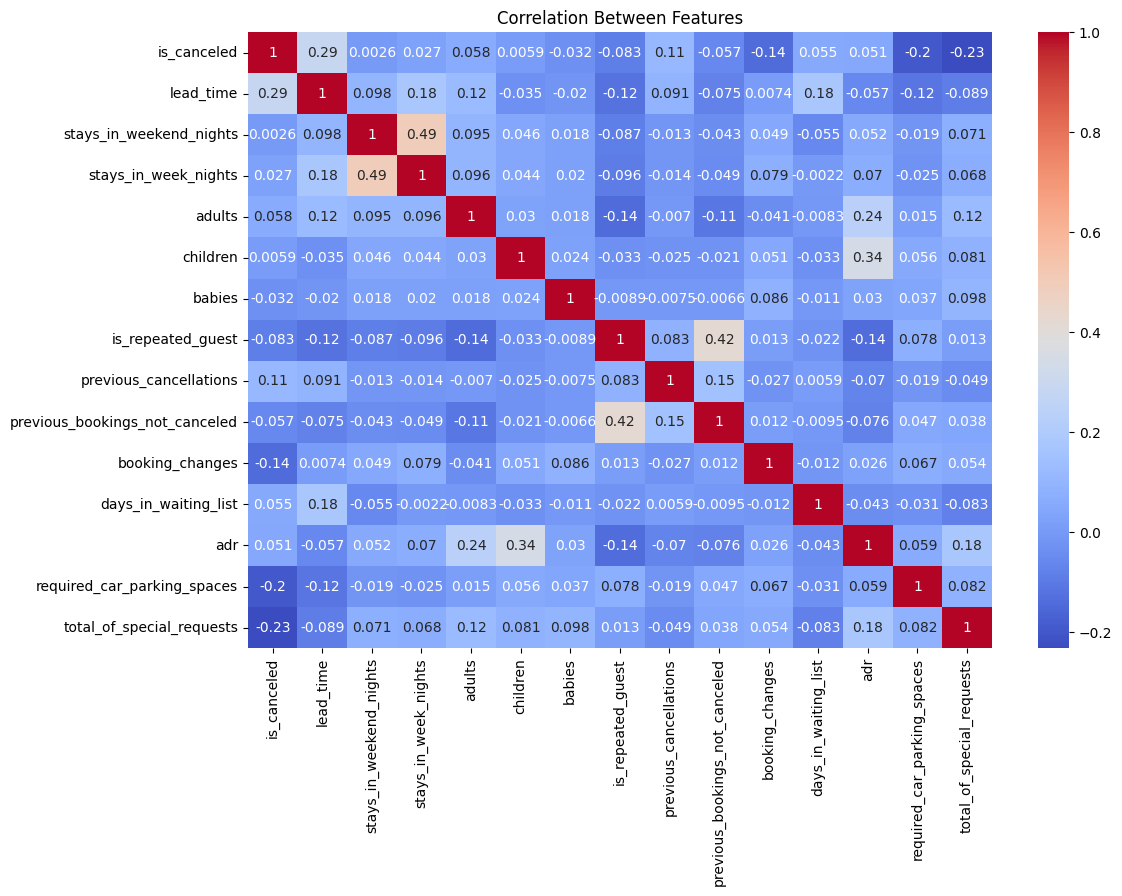

In [182]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()

<Axes: title={'center': 'Cancellation by Customer Type'}, xlabel='customer_type'>

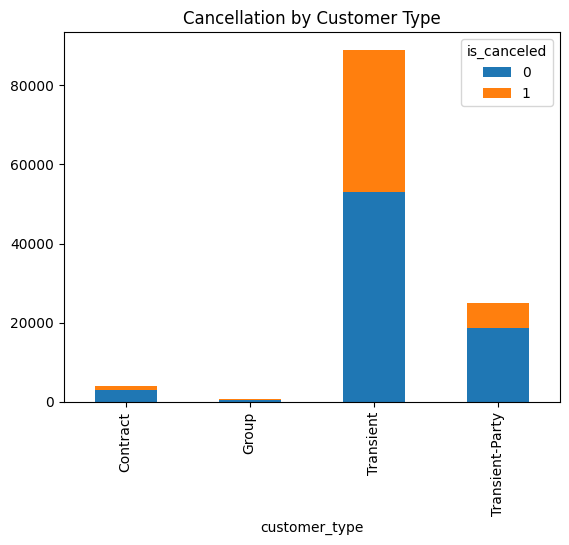

In [183]:
pd.crosstab(df['customer_type'], df['is_canceled']).plot(kind='bar', stacked=True, title='Cancellation by Customer Type')

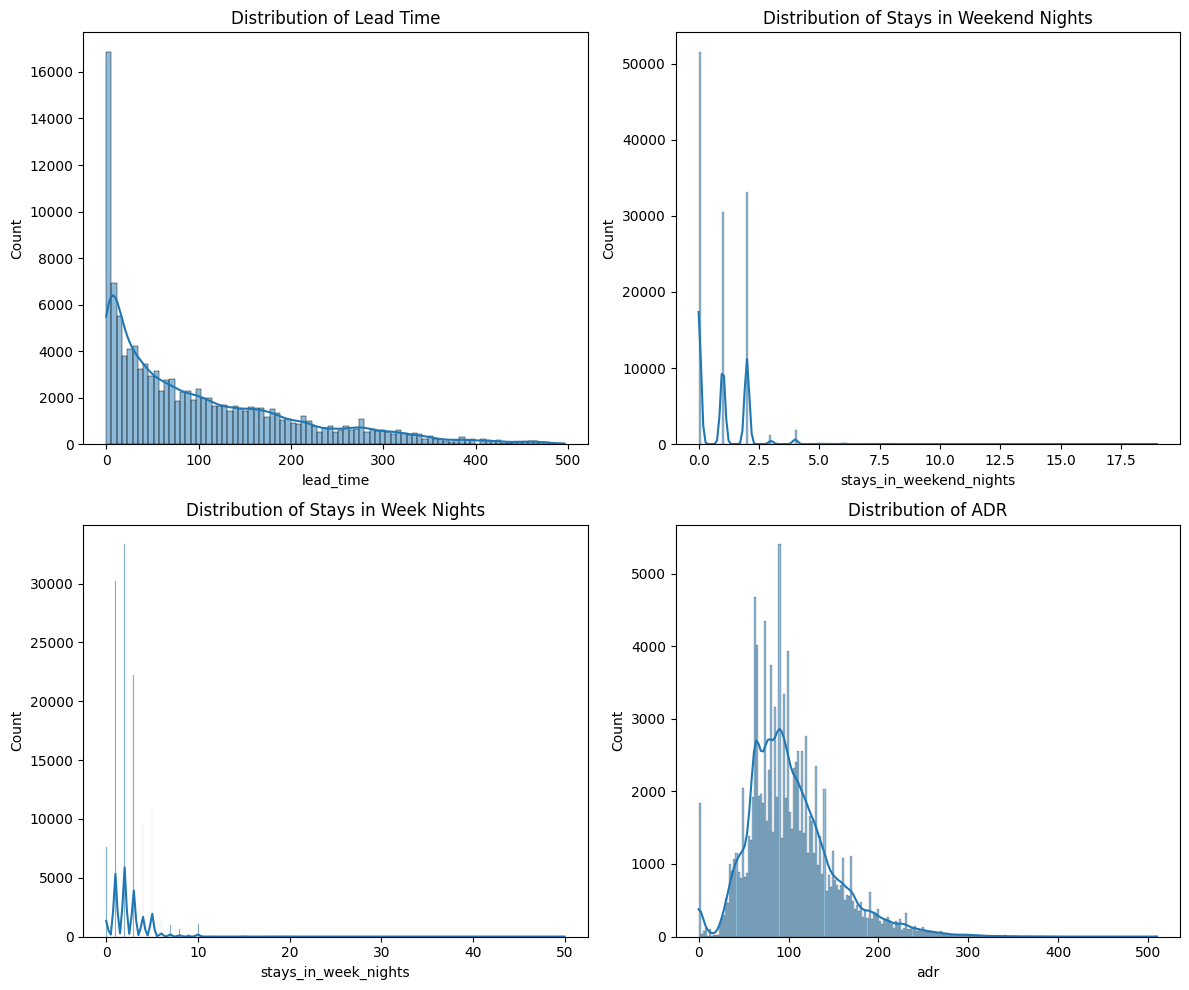

In [184]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.histplot(df['lead_time'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Lead Time')

sns.histplot(df['stays_in_weekend_nights'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of Stays in Weekend Nights')

sns.histplot(df['stays_in_week_nights'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of Stays in Week Nights')

sns.histplot(df['adr'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribution of ADR')

plt.tight_layout()
plt.show()

## Data Encodeing

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118727 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118727 non-null  object        
 1   is_canceled                     118727 non-null  int64         
 2   lead_time                       118727 non-null  int64         
 3   stays_in_weekend_nights         118727 non-null  int64         
 4   stays_in_week_nights            118727 non-null  int64         
 5   adults                          118727 non-null  int64         
 6   children                        118727 non-null  float64       
 7   babies                          118727 non-null  int64         
 8   meal                            118727 non-null  object        
 9   country                         118727 non-null  object        
 10  market_segment                  118727 non-null  object      

In [200]:
# save cleaned df
# cleaned_df_path = path+"/cleaned_hotel_booking_demand.csv"
# df.to_csv(cleaned_df_path, index=False)

In [187]:
df['arrival_year'] = df['arrival_date'].dt.year
df['arrival_month'] = df['arrival_date'].dt.month
df['arrival_day'] = df['arrival_date'].dt.day
df['arrival_weekday'] = df['arrival_date'].dt.weekday  # 0 = Monday, 6 = Sunday
df.drop(columns=['arrival_date'], inplace=True)

In [188]:
df.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_year,arrival_month,arrival_day,arrival_weekday
count,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.00000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000
mean,0.368796,102.247905,0.928929,2.501301,1.858987,0.104467,0.007993,0.031619,0.087545,0.137635,0.21952,2.330658,102.064753,0.062808,0.573341,2016.154649,6.552562,15.797704,2.997751
std,0.482480,102.969115,0.995248,1.899101,0.576049,0.399591,0.097706,0.174984,0.846617,1.501146,0.63943,17.633138,48.077802,0.245826,0.793565,0.707634,3.084172,8.781080,1.953708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000
25%,0.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,70.000000,0.000000,0.000000,2016.000000,4.000000,8.000000,1.000000
50%,0.000000,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,95.000000,0.000000,0.000000,2016.000000,7.000000,16.000000,3.000000
75%,1.000000,159.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,126.000000,0.000000,1.000000,2017.000000,9.000000,23.000000,5.000000
max,1.000000,496.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.00000,391.000000,510.000000,8.000000,5.000000,2017.000000,12.000000,31.000000,6.000000


In [189]:
df.describe(include="object")

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,reservation_status
count,118727,118727,118727,118727,118727,118727,118727,118727,118727,118727,118727
unique,2,5,177,8,5,9,11,3,334,4,3
top,City Hotel,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9,Transient,Check-Out
freq,78707,91777,48545,56408,97270,85399,73555,104382,31922,89070,74941


In [190]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'agent',
 'customer_type',
 'reservation_status']

In [191]:
for col in categorical_columns:
    print(f'⭐ Number of column {col} is : ',df[col].nunique())
    print(f'🌙 Data of column {col} is : ',df[col].unique())

⭐ Number of column hotel is :  2
🌙 Data of column hotel is :  ['Resort Hotel' 'City Hotel']
⭐ Number of column meal is :  5
🌙 Data of column meal is :  ['BB' 'FB' 'HB' 'SC' 'Undefined']
⭐ Number of column country is :  177
🌙 Data of column country is :  ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118727 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118727 non-null  object 
 1   is_canceled                     118727 non-null  int64  
 2   lead_time                       118727 non-null  int64  
 3   stays_in_weekend_nights         118727 non-null  int64  
 4   stays_in_week_nights            118727 non-null  int64  
 5   adults                          118727 non-null  int64  
 6   children                        118727 non-null  float64
 7   babies                          118727 non-null  int64  
 8   meal                            118727 non-null  object 
 9   country                         118727 non-null  object 
 10  market_segment                  118727 non-null  object 
 11  distribution_channel            118727 non-null  object 
 12  is_repeated_guest    

In [193]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,arrival_year,arrival_month,arrival_day,arrival_weekday
0,1,0,342,0,0,2,0.0,0,0,135,...,0,2,0.0,0,0,1,2015,7,1,2
2,1,0,7,0,1,1,0.0,0,0,59,...,0,2,75.0,0,0,1,2015,7,1,2
3,1,0,13,0,1,1,0.0,0,0,59,...,0,2,75.0,0,0,1,2015,7,1,2
4,1,0,14,0,2,2,0.0,0,0,59,...,0,2,98.0,0,1,1,2015,7,1,2
5,1,0,14,0,2,2,0.0,0,0,59,...,0,2,98.0,0,1,1,2015,7,1,2


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118727 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118727 non-null  int64  
 1   is_canceled                     118727 non-null  int64  
 2   lead_time                       118727 non-null  int64  
 3   stays_in_weekend_nights         118727 non-null  int64  
 4   stays_in_week_nights            118727 non-null  int64  
 5   adults                          118727 non-null  int64  
 6   children                        118727 non-null  float64
 7   babies                          118727 non-null  int64  
 8   meal                            118727 non-null  int64  
 9   country                         118727 non-null  int64  
 10  market_segment                  118727 non-null  int64  
 11  distribution_channel            118727 non-null  int64  
 12  is_repeated_guest    

In [195]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_cols = df.select_dtypes(include=['float64','int32']).columns

numerical_cols = numerical_cols.drop('is_canceled') if 'is_canceled' in numerical_cols else numerical_cols

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,arrival_year,arrival_month,arrival_day,arrival_weekday
0,1,0,342,0,0,2,0.0,0,0,135,...,0,2,0.000000,0,0,1,0.0,0.545455,0.0,0.333333
2,1,0,7,0,1,1,0.0,0,0,59,...,0,2,0.147059,0,0,1,0.0,0.545455,0.0,0.333333
3,1,0,13,0,1,1,0.0,0,0,59,...,0,2,0.147059,0,0,1,0.0,0.545455,0.0,0.333333
4,1,0,14,0,2,2,0.0,0,0,59,...,0,2,0.192157,0,1,1,0.0,0.545455,0.0,0.333333
5,1,0,14,0,2,2,0.0,0,0,59,...,0,2,0.192157,0,1,1,0.0,0.545455,0.0,0.333333


In [196]:
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [198]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [199]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9893315365394874
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     22456
           1       1.00      0.97      0.99     13163

    accuracy                           0.99     35619
   macro avg       0.99      0.99      0.99     35619
weighted avg       0.99      0.99      0.99     35619

